<a href="https://colab.research.google.com/github/fariqM/BisnisCerdas_PY/blob/main/Tugas4/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation : Import package


In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import matplotlib.pyplot as plt
import os

from google.colab import files
import io


# Upload the file

In [2]:
uploaded = files.upload()

Saving insurance.csv to insurance.csv


# membaca file yang telah diupload

In [3]:
df = pd.read_csv(io.BytesIO(uploaded["insurance.csv"]))

# Melihat 10 data sampel

In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Menampilkan beberapa deskripsi data yang ada
* Data yang ditampilkan adalah:
> 1. Count
> 2. Mean
> 3. Standard Deviasi
> 4. Min
> 5. 25%
> 6. 50%
> 7. 75%
> 8. Max



In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Menampilkan informasi dan karakter data
Informasi yang ditampilkan:
> 1. Fitur / kolom dari dataset
> 2. Jumlah data yang tidak NULL
> 3. Tipe data dari fitur yang disediakan

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


menampilkan total data, terdapat :
* 1338 data
* 7 fitur

In [7]:
print('Jumlah baris dan kolom dalam data set: ',df.shape)

Jumlah baris dan kolom dalam data set:  (1338, 7)


# Null Attributes to Null Numeric

In [8]:
# Check for null count column wise
df.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Melukis data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


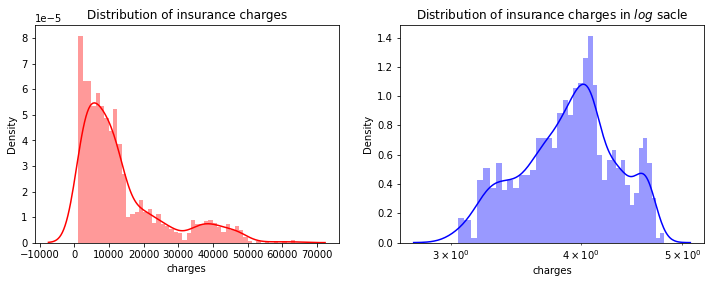

In [9]:
f   = plt.figure(figsize=(12,4))
ax  = f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax  = f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')
plt.show()

# Sama saja, hanya bedanya pake barplot

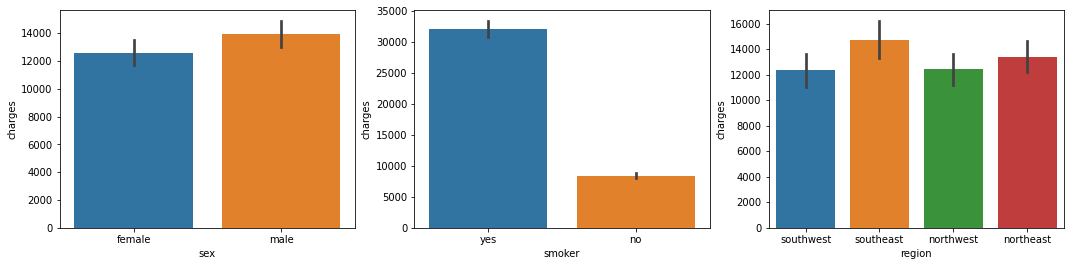

In [10]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.barplot(x='sex', y='charges', data=df)
plt.subplot(132)
sns.barplot(x='smoker', y='charges', data=df)
plt.subplot(133)
sns.barplot(x='region', y='charges', data=df)
plt.show()

# Ini juga sama hanya pake pairplot yang beda

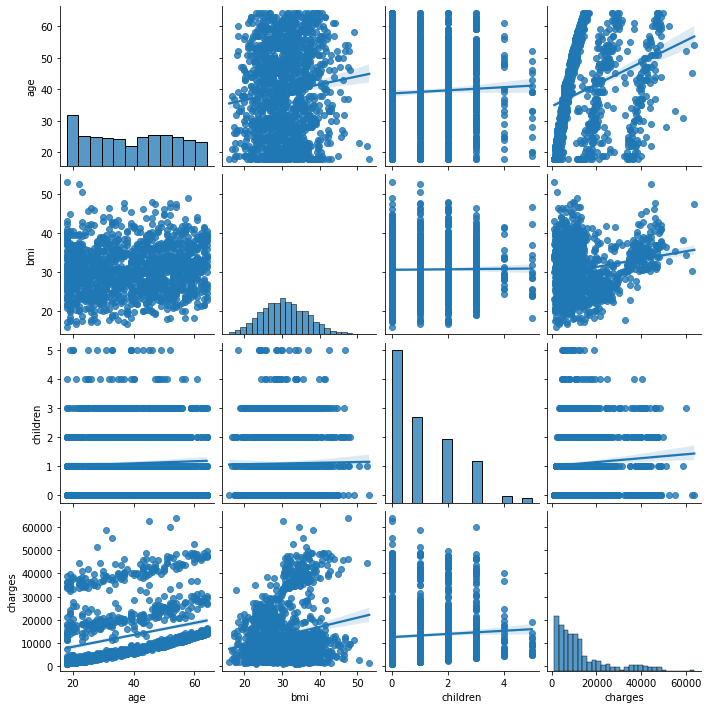

In [11]:
sns.pairplot(df,kind="reg")

# kalo ini pake seabron.heatmap
- Fungsinya adalah Plot data persegi panjang sebagai matriks yang disandikan warna
- Variabel yang ditampilkan berasal dari seluruh fitur

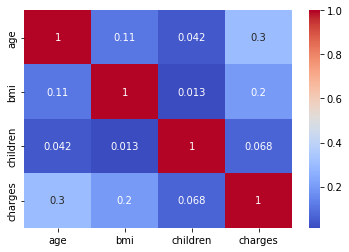

In [12]:

 #Plot a heatmap and look at the corelation
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)

# mengubah nilai atribute kedalam binary agar mudah dideskripsikan di sistem





- Data pertama yang diubah adalah variabel pada fitur 'sex'
> 1. Laki-laki = 1
> 2. Perempuan = 0
- Data kedua yang diubah adalah variabel pada fitur 'smoker'
> 1. Ya = 1
> 2. Tidak = 0

In [13]:
df['sex']    = df['sex'].map({'male':1, 'female':0})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})

# Untuk memudahkan pemrosessan data region diubah menjadi binary, ketika suatu row terdapat dalam region tertentu maka region tersebut bernilai true atau 1


In [14]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


# proses training



In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('charges',axis=1) # Independet variable
y = df['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Linear Regression

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# print score hasil

In [17]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(lr.score(X_test,y_test))

0.7958786376014415


# menggunakan fungsi PolynomialFeature



In [25]:
def polynomial_features_score(x_drop, y_drop):
  X = df.drop(x_drop, axis = 1)
  Y = y_drop

  quad = PolynomialFeatures (degree = 2)
  x_quad = quad.fit_transform(X)

  X_train, X_test, Y_train, Y_test = train_test_split(x_quad, Y, random_state = 0)

  plr = LinearRegression().fit(X_train,Y_train)

  Y_train_pred = plr.predict(X_train)
  Y_test_pred = plr.predict(X_test)

  return print(plr.score(X_test, Y_test))

# **BMI**

In [19]:
x_drop_bmi = ['bmi','region_northwest','region_southeast','region_southwest']
y_drop_bmi = df.bmi

polynomial_features_score(x_drop_bmi, y_drop_bmi)

0.15400804414822533


# **Children**

In [20]:
x_drop_children = ['children','region_northwest','region_southeast','region_southwest']
y_drop_children = df.children

polynomial_features_score(x_drop_children, y_drop_children)

0.13563844603471964


# **Smoker**

In [21]:
x_drop_smoker = ['smoker','region_northwest','region_southeast','region_southwest']
y_drop_smoker = df.smoker

polynomial_features_score(x_drop_smoker, y_drop_smoker)

0.7775177839188638


# **Charges**

In [22]:
x_drop_charges = ['charges','region_northwest','region_southeast','region_southwest']
y_drop_charges = df.charges

polynomial_features_score(x_drop_charges, y_drop_charges)

0.8849197344147228


# **Sex**

In [23]:
x_drop_sex = ['sex','region_northwest','region_southeast','region_southwest']
y_drop_sex = df.sex

polynomial_features_score(x_drop_sex, y_drop_sex)

0.009967450644672637


# **Age**

In [24]:
x_drop_age = ['age','region_northwest','region_southeast','region_southwest']
y_drop_age = df.age

polynomial_features_score(x_drop_age, y_drop_age)

0.5220685679680568
